<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Edx_MiniProject_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies data analysis


In [ ]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.getcwd()

In [ ]:
path='D:/Lap trinh/Data science/Micromaster Data science Sandiego/Edx Python/Week-4-Pandas/ml-latest-small/'
#path ='/home/user/'

In [ ]:
movies = pd.read_csv(path + 'movies.csv')
movies.head()

In [ ]:
movies.isnull().any()

In [ ]:
ratings = pd.read_csv(path + 'ratings.csv')
ratings.head()

In [ ]:
ratings.isnull().any()

In [ ]:
ratings['praised_time']=pd.to_datetime(ratings['timestamp'],unit='s')

In [ ]:
ratings

In [ ]:
ratings['Date']=ratings['praised_time'].dt.date
ratings['Date']

In [ ]:
ratings['Time']=ratings['praised_time'].dt.time
ratings['Time']

In [ ]:
ratings

In [ ]:
del ratings['timestamp']
ratings

In [ ]:
ratings_average=ratings[['movieId','rating']].groupby('movieId').mean()
ratings_average

In [ ]:
ratings_average=ratings_average.sort_values(by='rating',ascending = False)

In [ ]:
# average rating of each movie
ratings_average

In [ ]:
ratings_count=ratings[['movieId','rating']].groupby('rating').count()
ratings_count

In [ ]:
#number of movied each rating:
ratings_count=ratings_count.sort_values(by='movieId',ascending = False)
ratings_count

### Merge

In [ ]:
all_movies=movies.merge(ratings_average,on='movieId',how='inner')
all_movies

In [ ]:
#Identify number of genres :

In [ ]:
a=[]
for i in range(all_movies.index.max()):
    a.extend(all_movies.genres.iloc[i].split('|'))
a

In [ ]:
from collections import Counter
genre_dict=dict(Counter(a))
genre_dict 

In [ ]:
genre_df = pd.DataFrame.from_dict(genre_dict,orient='index',columns=['count'])
genre_df.index.name ='genres'
genre_df

In [ ]:
genre_df=genre_df.sort_values(by ='count',ascending =False)
genre_df

In [ ]:
list_genres=list(set(a))
list_genres

In [ ]:
len(list_genres)

In [ ]:
for name in list_genres:
    all_movies[name]=all_movies['genres'].str.contains(name)
all_movies

In [ ]:
genres_rating={}
for name in list_genres:
    rating= float(all_movies[[name,'rating']].groupby(name).mean().loc[True].values)
    genres_rating[name]=rating
    
genres_rating

In [ ]:
genres_rating_df=pd.DataFrame.from_dict(genres_rating,orient='index',columns=['rating_average'])
genres_rating_df.index.name='genres'
genres_rating_df


In [ ]:
genres_rating_df.columns

In [ ]:
genres_rating_df=genres_rating_df.sort_values(by ='rating_average',ascending =False)
genres_rating_df

In [ ]:
genres_rating_final=pd.merge(genre_df,genres_rating_df,on='genres')
genres_rating_final=genres_rating_final.sort_values(by='rating_average',ascending=False)
genres_rating_final

### Plot Genres counting and rating

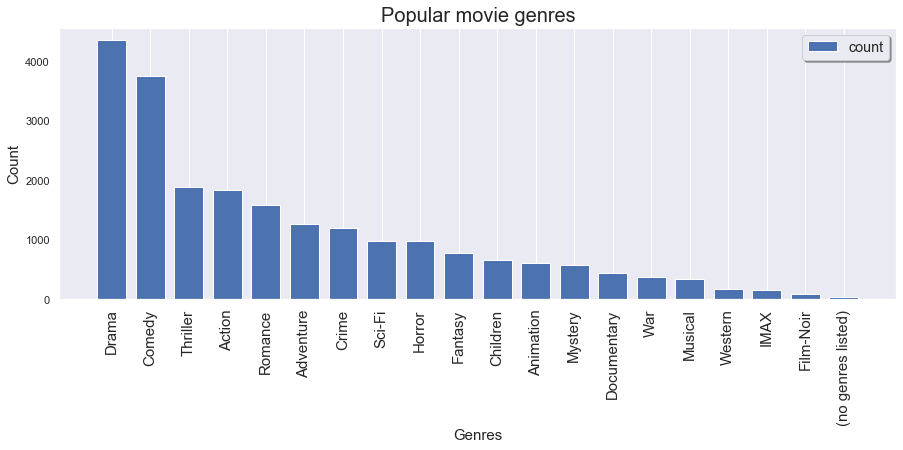

In [ ]:
genres_rating_final2=genres_rating_final.sort_values(by='count',ascending=False)
count = genres_rating_final2['count']
index = genres_rating_final2.index
    
fig, ax1 = plt.subplots(figsize=(15,5))


ax1.bar(index,count, color='b', width=0.75, label='count') #count

ax1.set_xticks(index)
ax1.set_xticklabels(index,rotation = 90,fontsize = 15) 


ax1.yaxis.grid(False)
ax1.set_title('Popular movie genres', fontsize=20)
ax1.set_xlabel('Genres',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)

legend1=ax1.legend(loc='upper right',shadow=True, fontsize='large')
#legend1.get_frame().set_facecolor('C0')
#legend2.get_frame().set_facecolor('C0')

plt.show()

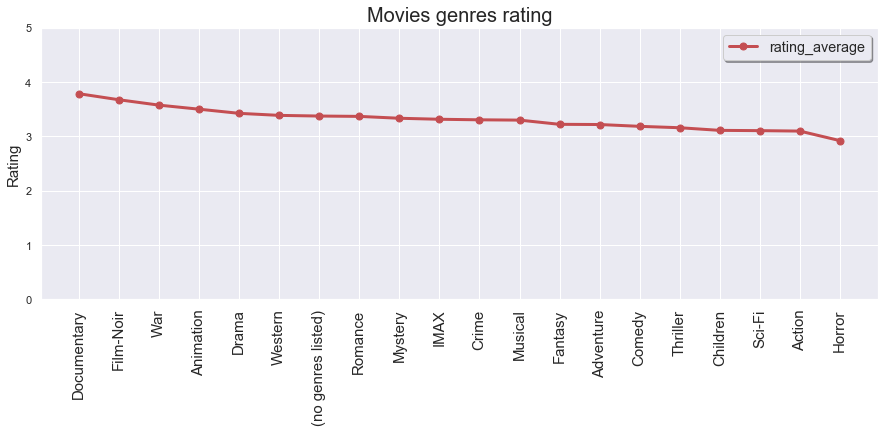

In [ ]:

rating_average = genres_rating_final['rating_average']
index = genres_rating_final.index
    
fig, ax2 = plt.subplots(figsize=(15,5))




ax2.plot(index,rating_average,'-',color='r',lw=3,marker='o',markersize=7,label='rating_average') #rating

ax2.set_xticks(index)
ax2.set_xticklabels(index,rotation = 90,fontsize = 15) 


ax2.yaxis.grid(True)
ax2.set_title('Movies genres rating', fontsize=20)
ax2.set_ylabel('Rating',fontsize=15)
ax2.set_ylim(0,5)

legend2=ax2.legend(loc='upper right',shadow=True, fontsize='large')
#legend1.get_frame().set_facecolor('C0')
#legend2.get_frame().set_facecolor('C0')

plt.show()

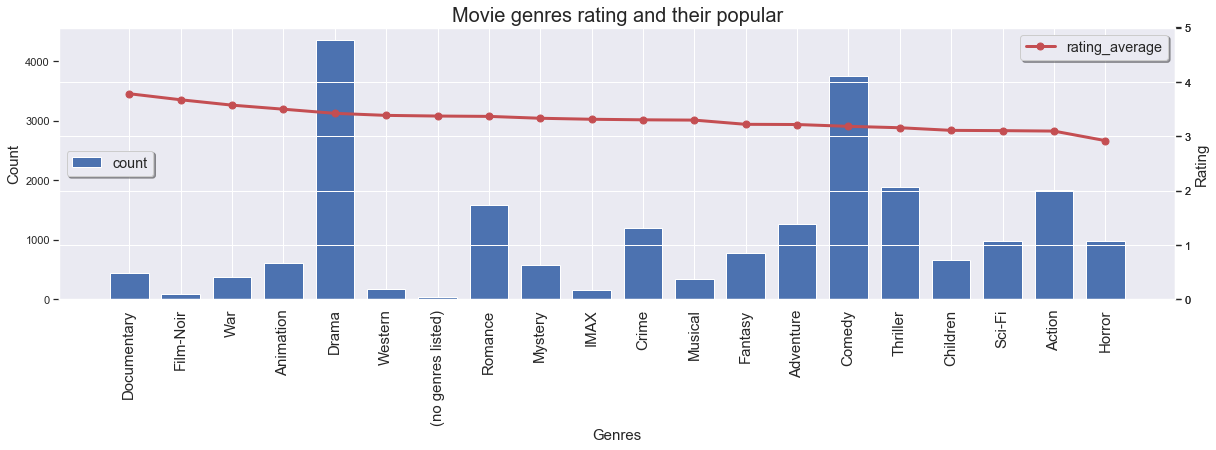

In [ ]:
count = genres_rating_final['count']
rating_average = genres_rating_final['rating_average']
    
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()
index = genres_rating_final.index

ax1.bar(index,count, color='b', width=0.75, label='count') #count
ax2.plot(index,rating_average,'-',color='r',lw=3,marker='o',markersize=7,label='rating_average') #rating

ax1.set_xticks(index)
ax1.set_xticklabels(index,rotation = 90,fontsize = 15) 

ax2.secondary_yaxis('right')

ax1.yaxis.grid(False)
ax1.set_title('Movie genres rating and their popular', fontsize=20)
ax1.set_xlabel('Genres',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)
ax2.set_ylabel('Rating',fontsize=15)
ax2.set_ylim(0,5)

legend1=ax1.legend(loc='center left',shadow=True, fontsize='large')
legend2=ax2.legend(loc='upper right',shadow=True, fontsize='large')
#legend1.get_frame().set_facecolor('C0')
#legend2.get_frame().set_facecolor('C0')

plt.show()